# Import Packages and Files

In [11]:
import dataloader as dl
import saveloader as sl
import rotation as rot

# Load Dataset

In [12]:
trainset, testset, classes = dl.load_cifar("./datasets")

Files already downloaded and verified
Files already downloaded and verified


In [13]:
trainloader, validloader, testloader = dl.make_dataloaders(trainset, testset, 5000, 128)

torch.Size([128, 3, 32, 32])
torch.Size([128])
plane  bird  frog horse


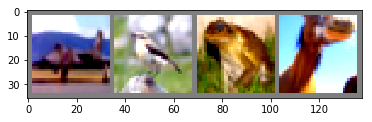

In [17]:
import torchvision
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figsize=(30.0, 30.0)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
# get some random training images from mnist
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape) 
print(labels.shape)

# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

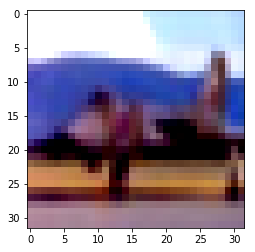

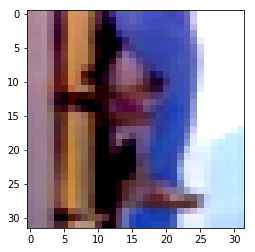

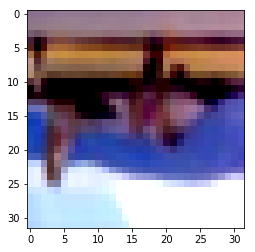

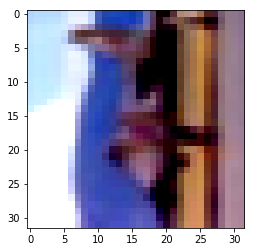

In [19]:
# test rotation implementation
imshow(torchvision.utils.make_grid(images[0]))
plt.show()
imshow(torchvision.utils.make_grid(rot.rot90(images[0])))
plt.show()
imshow(torchvision.utils.make_grid((rot.rot180(images[0]))))
plt.show()
imshow(torchvision.utils.make_grid((rot.rot270(images[0]))))
plt.show()